In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('data/trades.csv', index_col=0)

In [3]:
df.shape

(2092, 29)

In [4]:
df.columns

Index(['Close', 'IV', 'RV', 'IV-RV', 'Week', 'Month', 'Quarter', 'target',
       'Yest_profits', 'Close_diff', 'Close_ema', 'Close_std',
       'Close_diff_ema', 'IV_diff', 'IV_ema', 'IV_std', 'IV_diff_ema',
       'RV_diff', 'RV_ema', 'RV_std', 'RV_diff_ema', 'IV-RV_diff', 'IV-RV_ema',
       'IV-RV_std', 'IV-RV_diff_ema', 'Yest_profits_diff', 'Yest_profits_ema',
       'Yest_profits_std', 'Yest_profits_diff_ema'],
      dtype='object')

In [5]:
# Splitting 

train = df.iloc[:1800].to_csv("data/train.csv", index=False)
test = df.iloc[1800:].to_csv("data/test.csv", index=False)


In [6]:
%reload_ext autoreload
from src.datapipeline import Datapipeline
pl = Datapipeline()
X_train, y_train = pl.transform_train_data('data/train.csv')
X_test, y_test = pl.transform_test_data('data/test.csv')

In [7]:
labels = pl.get_labels()
labels

array(['IV', 'RV', 'IV-RV'], dtype='<U32')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

params = {"max_depth": 1, "max_features": "auto", "splitter": "best"}

model = RandomForestClassifier()
params = [{"max_depth": list(range(10, 15)), "max_features": list(range(0, 14))}]
model_grid = GridSearchCV(model, params, cv=10, scoring="accuracy")
model_grid.fit(X_train, y_train)
model_grid.best_params_
# y_pred = model.predict(X_test)
# y_pred_prob=model.predict_proba(X_test)[:,1]

/Users/felicia/miniconda3/envs/fs/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/felicia/miniconda3/envs/fs/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/felicia/miniconda3/envs/fs/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/felicia/miniconda3/envs/fs/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    

{'max_depth': 14, 'max_features': 7}

In [15]:
model = RandomForestClassifier(max_depth=14, max_features= 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.5671641791044776
0.24836601307189543
0.34545454545454546
0.5068493150684932
              precision    recall  f1-score   support

           0       0.49      0.79      0.60       139
           1       0.57      0.25      0.35       153

    accuracy                           0.51       292
   macro avg       0.53      0.52      0.47       292
weighted avg       0.53      0.51      0.47       292



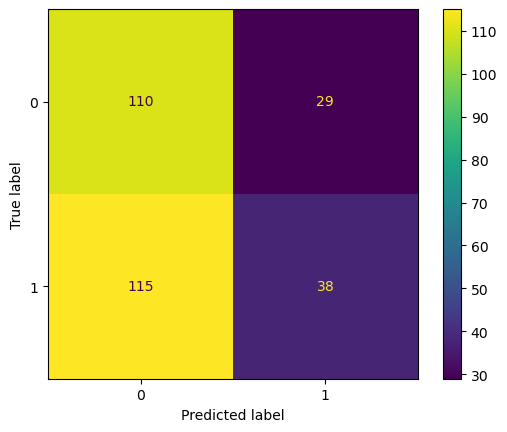

In [16]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay,
)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

# Precision/Recall using sklearn functions
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))